# Questão 1

![Lista 6 - FECD_B - Bruno Leal Fonseca _01.jpg](<attachment:Lista 6 - FECD_B - Bruno Leal Fonseca _01.jpg>)
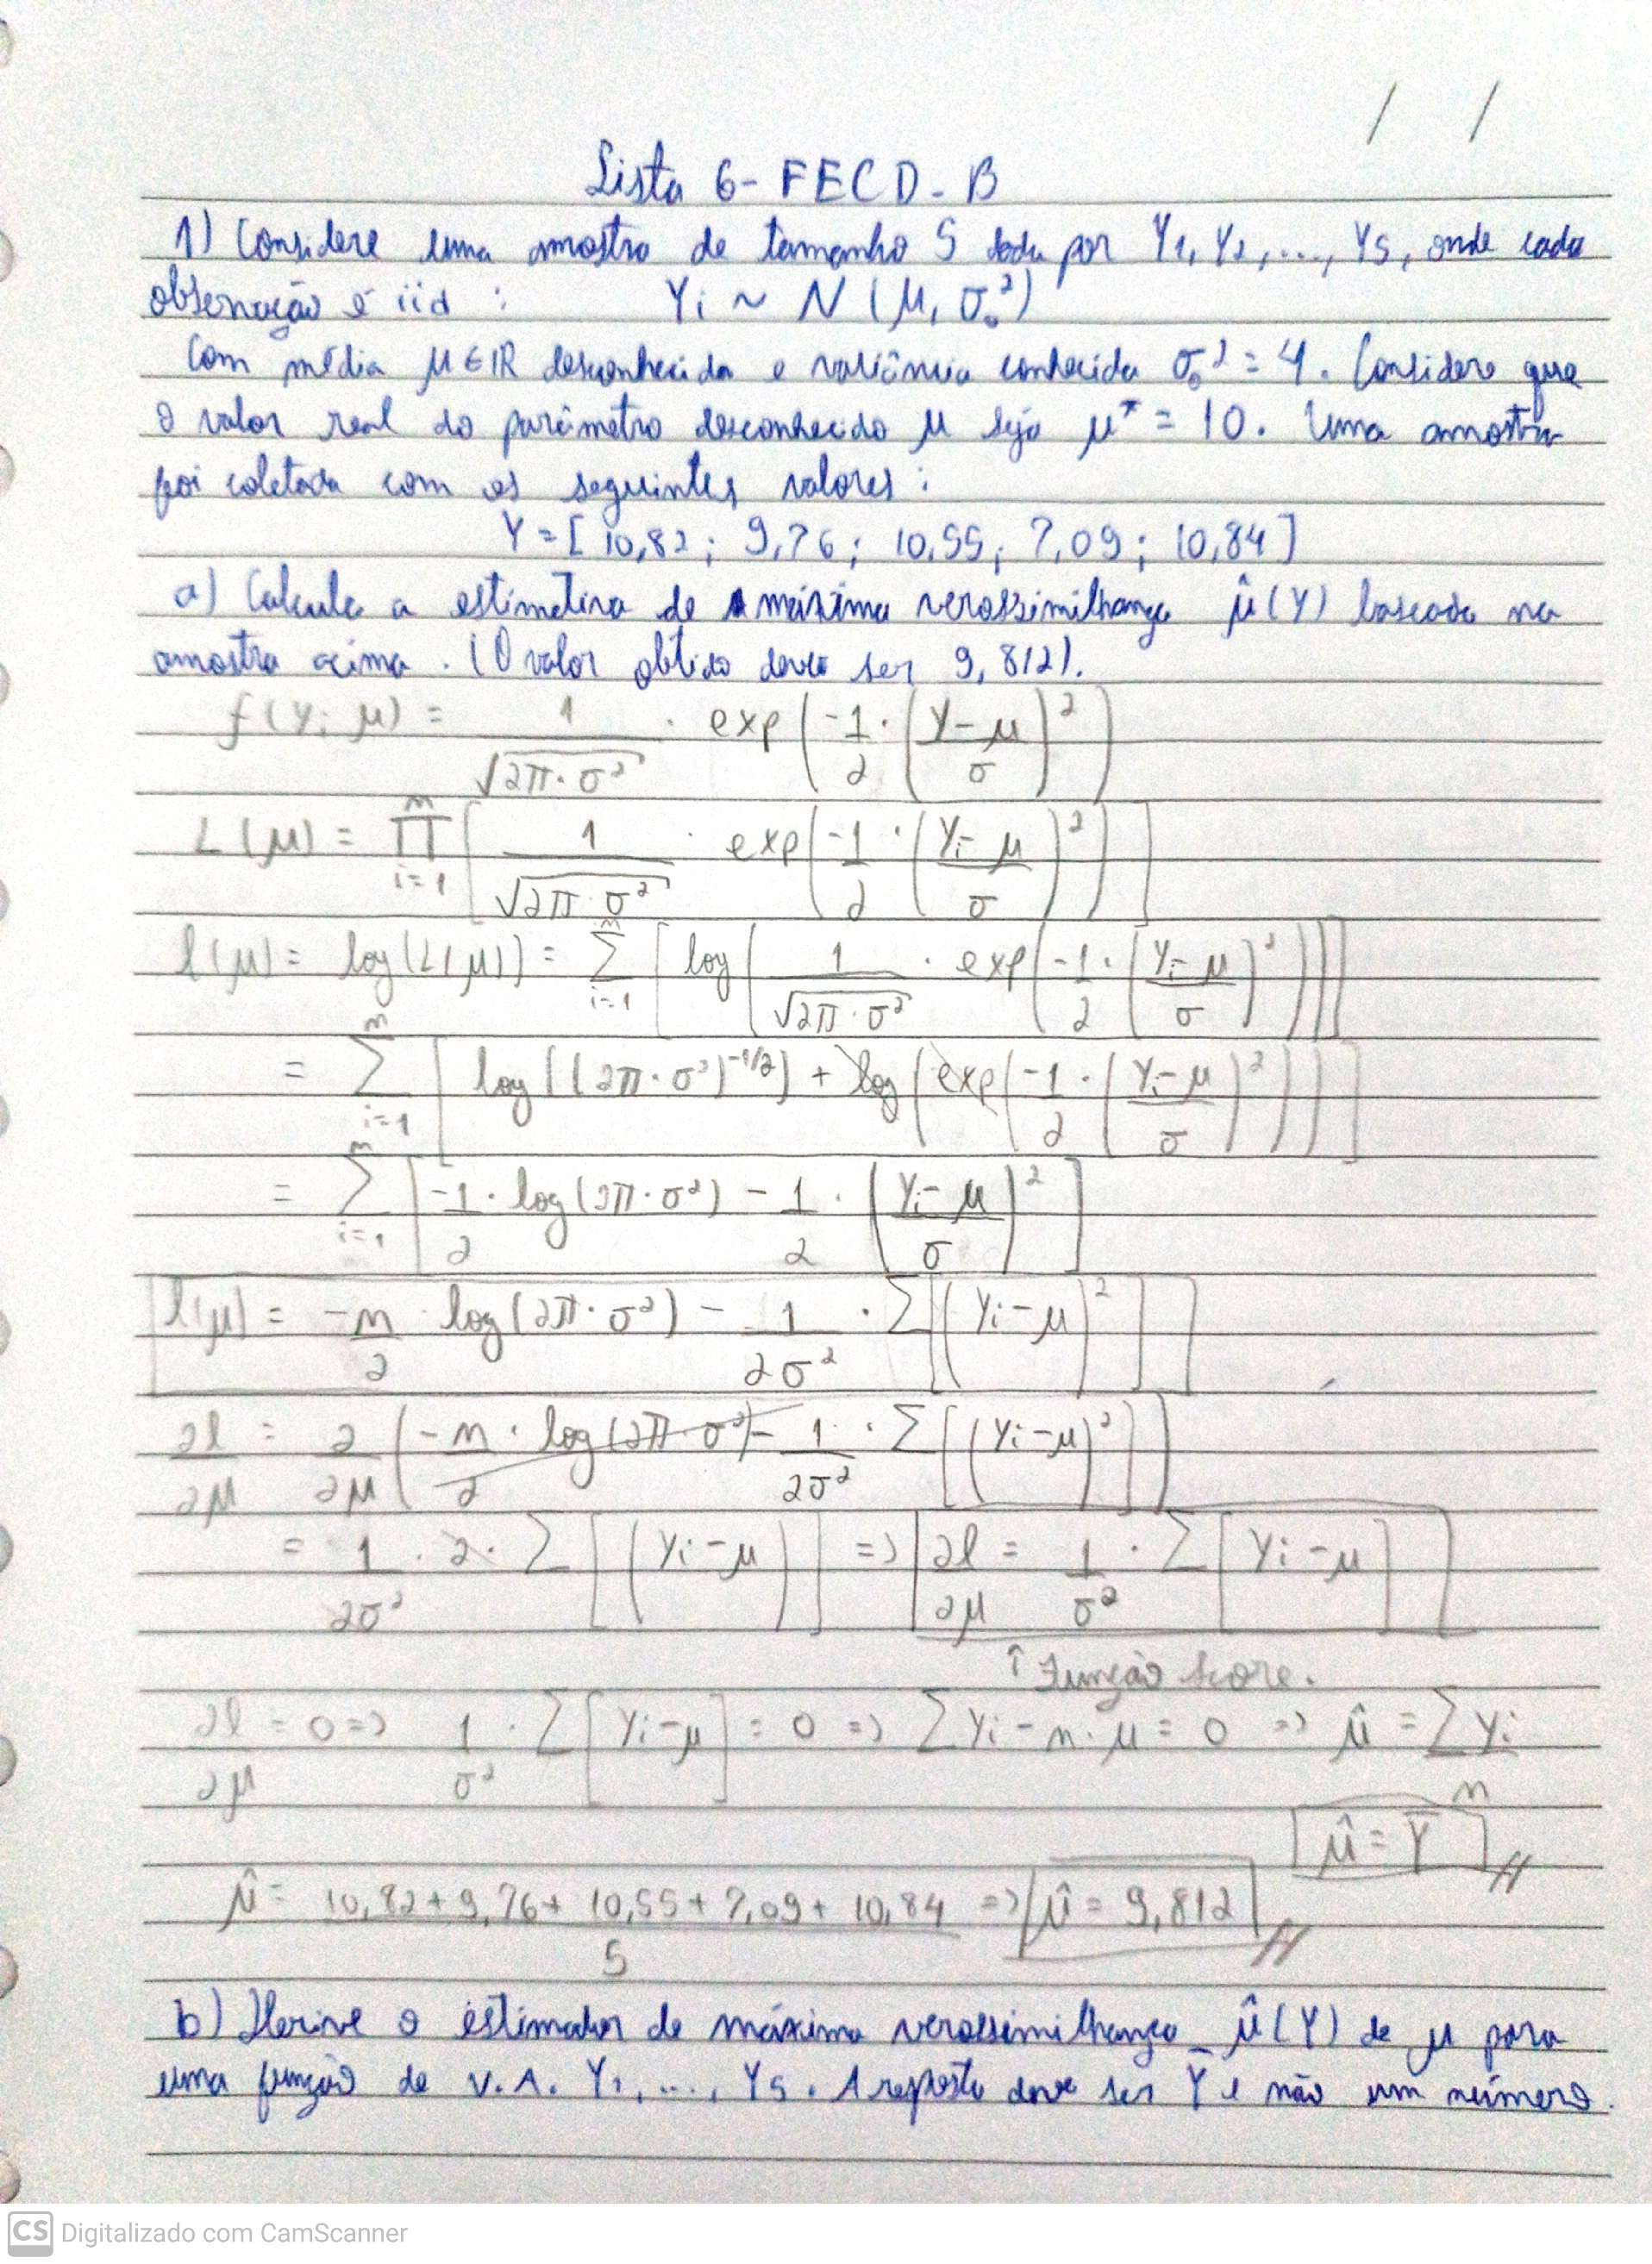

![Lista 6 - FECD_B - Bruno Leal Fonseca _01_2.jpg](<attachment:Lista 6 - FECD_B - Bruno Leal Fonseca _01_2.jpg>)
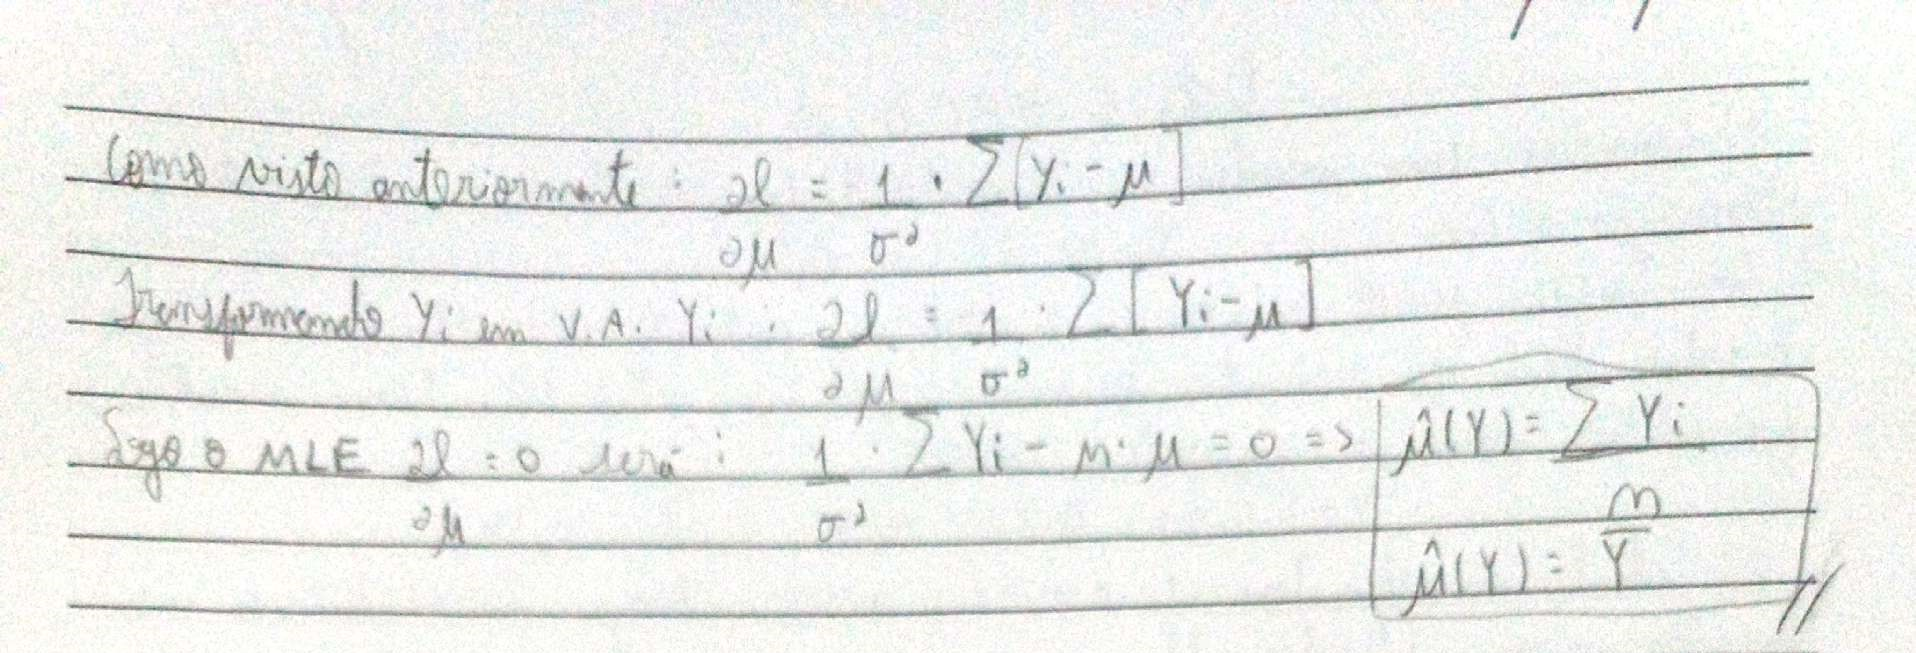

In [1]:
from dataclasses import dataclass
from typing import List
import numpy as np
import matplotlib.pyplot as plt


@dataclass
class MLEGaussian:
    sigma2: float
    mu_true: float
    sample: list[float]

    def get_score_function(self, interval: tuple, size: int, plot: bool = False):
        interval_values = np.linspace(interval[0], interval[1], size)
        score_function = (1 / self.sigma2) * (np.sum(self.sample) - len(self.sample) * interval_values)
        mu_optimal = np.sum(self.sample) / len(self.sample)

        if plot:
            plt.figure()
            plt.plot(interval_values, score_function)
            plt.axvline(x=self.mu_true, color="green")
            plt.axvline(x=mu_optimal, color="red")
            plt.grid()
            plt.legend(["Score Function", "True Value", r"$\hat{\mu}(y)$"])
            plt.show()

        return score_function, mu_optimal


def compare_optmizers(optimizers: List[MLEGaussian], interval: tuple, size: int, mu_true: float):
    score_function_list = []
    mu_hat_list = []

    for opt in optimizers:
        score_values, mu_hat = opt.get_score_function(interval, size)
        score_function_list.append(score_values)
        mu_hat_list.append(mu_hat)

    plt.figure()
    interval_values = np.linspace(interval[0], interval[1], size)
    for idx, (sc_f, mu_h) in enumerate(zip(score_function_list, mu_hat_list)):
        print(f"mu_hat_{idx+1} = {mu_h}")
        plt.plot(interval_values, sc_f, color=f"C{idx}", label=f"Sample {idx+1}")
        plt.axvline(x=mu_h, ls="--", color=f"C{idx}", label=r"$\hat{\mu}" + f"{idx+1}" + r"$")
    plt.axvline(x=mu_true, color="red", label="True Value")
    plt.legend()
    plt.grid()
    plt.show()


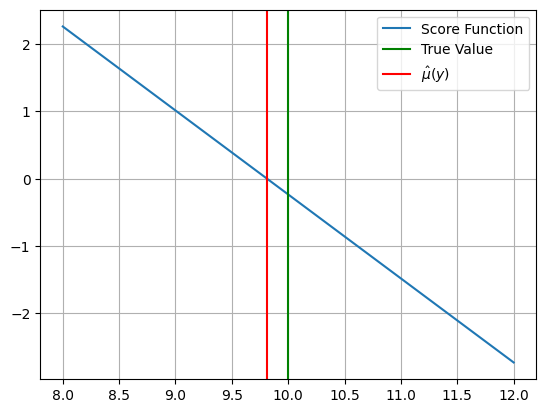

mu_hat_1 = 9.812000000000001
mu_hat_2 = 10.086000000000002


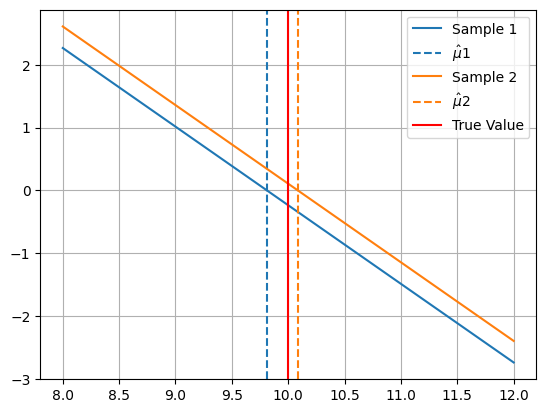

In [2]:
mle1 = MLEGaussian(4.0, 10.0, [10.82, 9.76, 10.55, 7.09, 10.84])
mle1.get_score_function((8, 12), 10, plot=True)

mle2 = MLEGaussian(4.0, 10.0, [12.98, 10.73, 8.49, 8.45, 9.78])
mle2.get_score_function((8, 12), 10)

compare_optmizers([mle1, mle2], (8, 12), 10, 10.0)

É possível notar que na primeira imagem, o valor de $\frac{\partial \ell}{\partial \mu}$ não é zero no ponto $\mu$=10, que seria o valor real do parâmetro. Isso mostra duas coisas, que o valor de $\hat{\mu}$ estimado pelo MLE é não viciado, oscilando em torno do valor real e que com uma amostra de tamanho `n=5` pode não ser suficiente para $\hat{\mu}$ ser aproximadamente $\mu$. Afinal sabe-se que a informação de Fisher aumenta linearmente com o tamanho da amostra.

No caso o valor obtido para $\hat{\mu}$ foi de: $\hat{\mu}$ = 9.812000000000001. Logo a função score $\frac{\partial \ell}{\partial \mu}$ é zero nesse ponto.

Já na segunda figura, onde são plotas as funções score para as duas amostras fornecidas, é possível notar que os estimadores são de fato não viciados, oscilando em torno do valor real de $\mu$. No caso da seguinte amostra o $\hat{\mu}$ = 10.086000000000002, ficando bem mais próxima ao valor real do que primeira amostra. Onde a função score dela é zero.

Sabendo que a função score $\frac{\partial \ell}{\partial \mu}$ é dada por: 

$\frac{\partial \ell}{\partial \mu}$ = $\frac{1}{\sigma^2} \sum_{i=1}^n Y_i - \mu$

O ponto de ótimo é onde $\frac{\partial \ell}{\partial \mu}$ é quando a função, dada uma amostra, é igual a zero. Esse valor de máxima verossimilhança pode ser dado por simplesmente pela média da amostra.

$\frac{1}{\sigma^2} \sum_{i=1}^n Y_i - \mu$ = 0   ->  $\hat{\mu}$ = $\frac{\sum_{i=1}^n Y_i}{n}$

# Questão 2

![Lista 6 - FECD_B - Bruno Leal Fonseca _02_1.jpg](<attachment:Lista 6 - FECD_B - Bruno Leal Fonseca _02_1.jpg>)
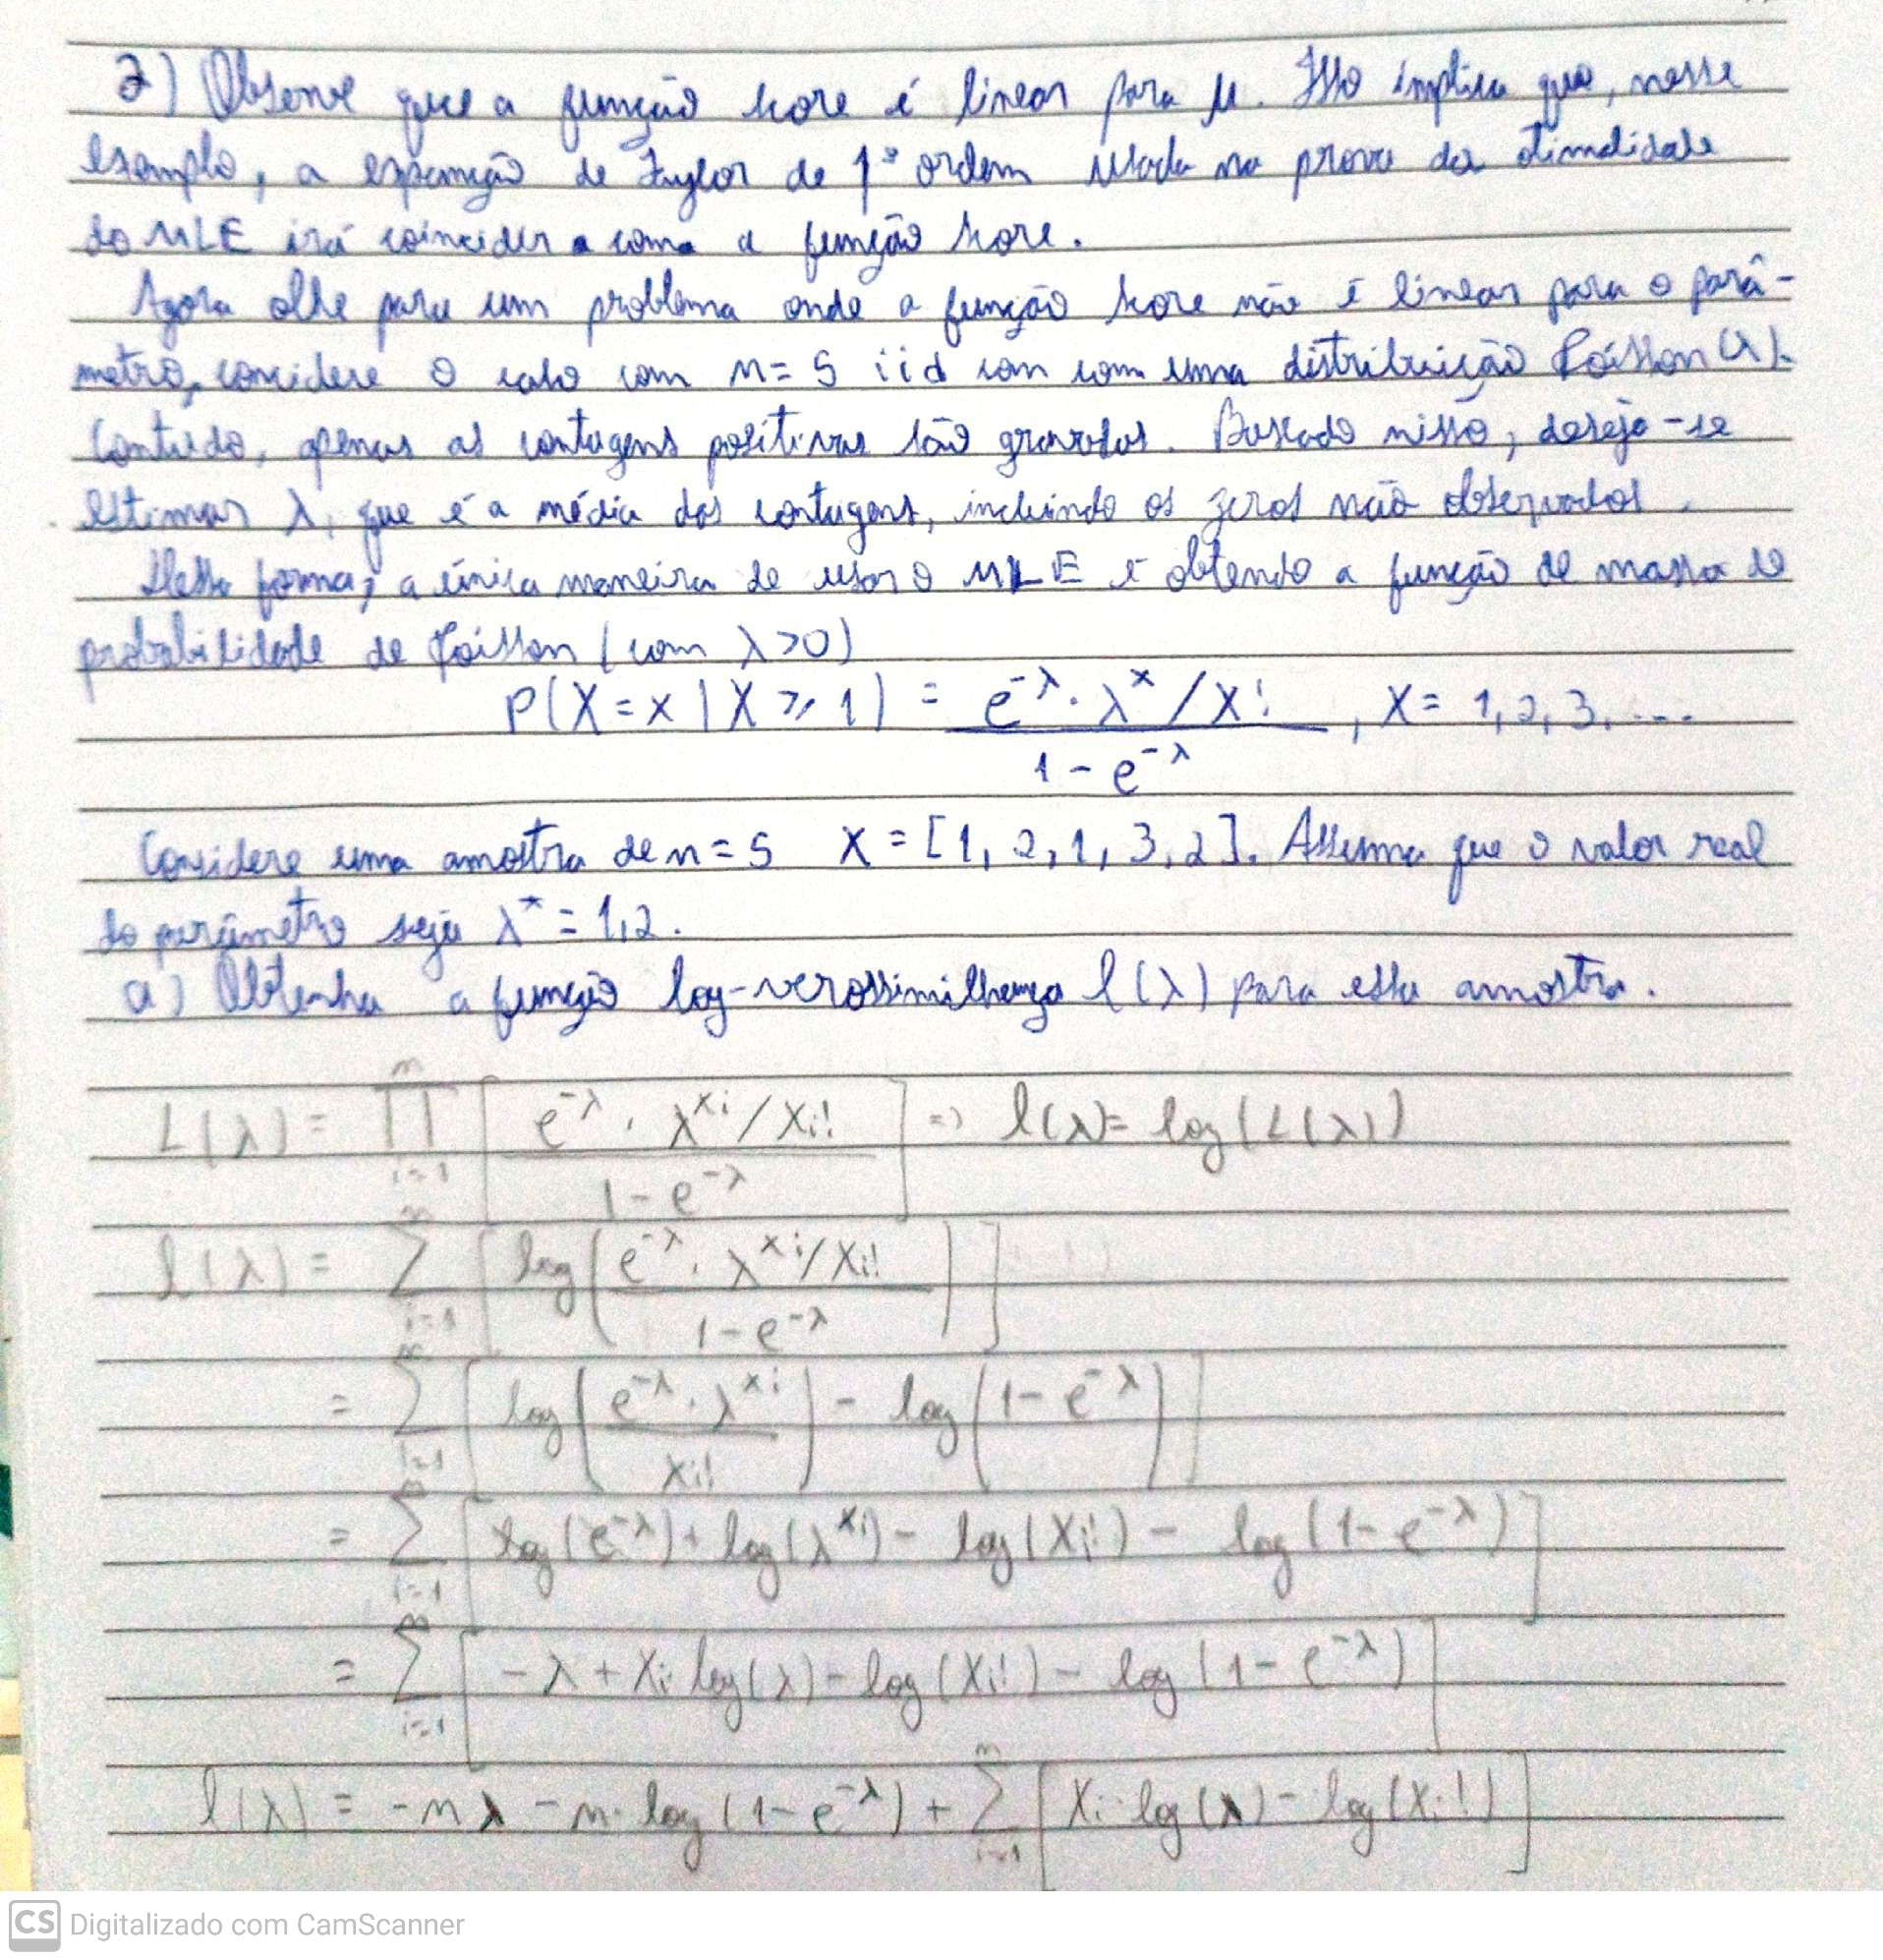

![Lista 6 - FECD_B - Bruno Leal Fonseca _03.jpg](<attachment:Lista 6 - FECD_B - Bruno Leal Fonseca _03.jpg>)
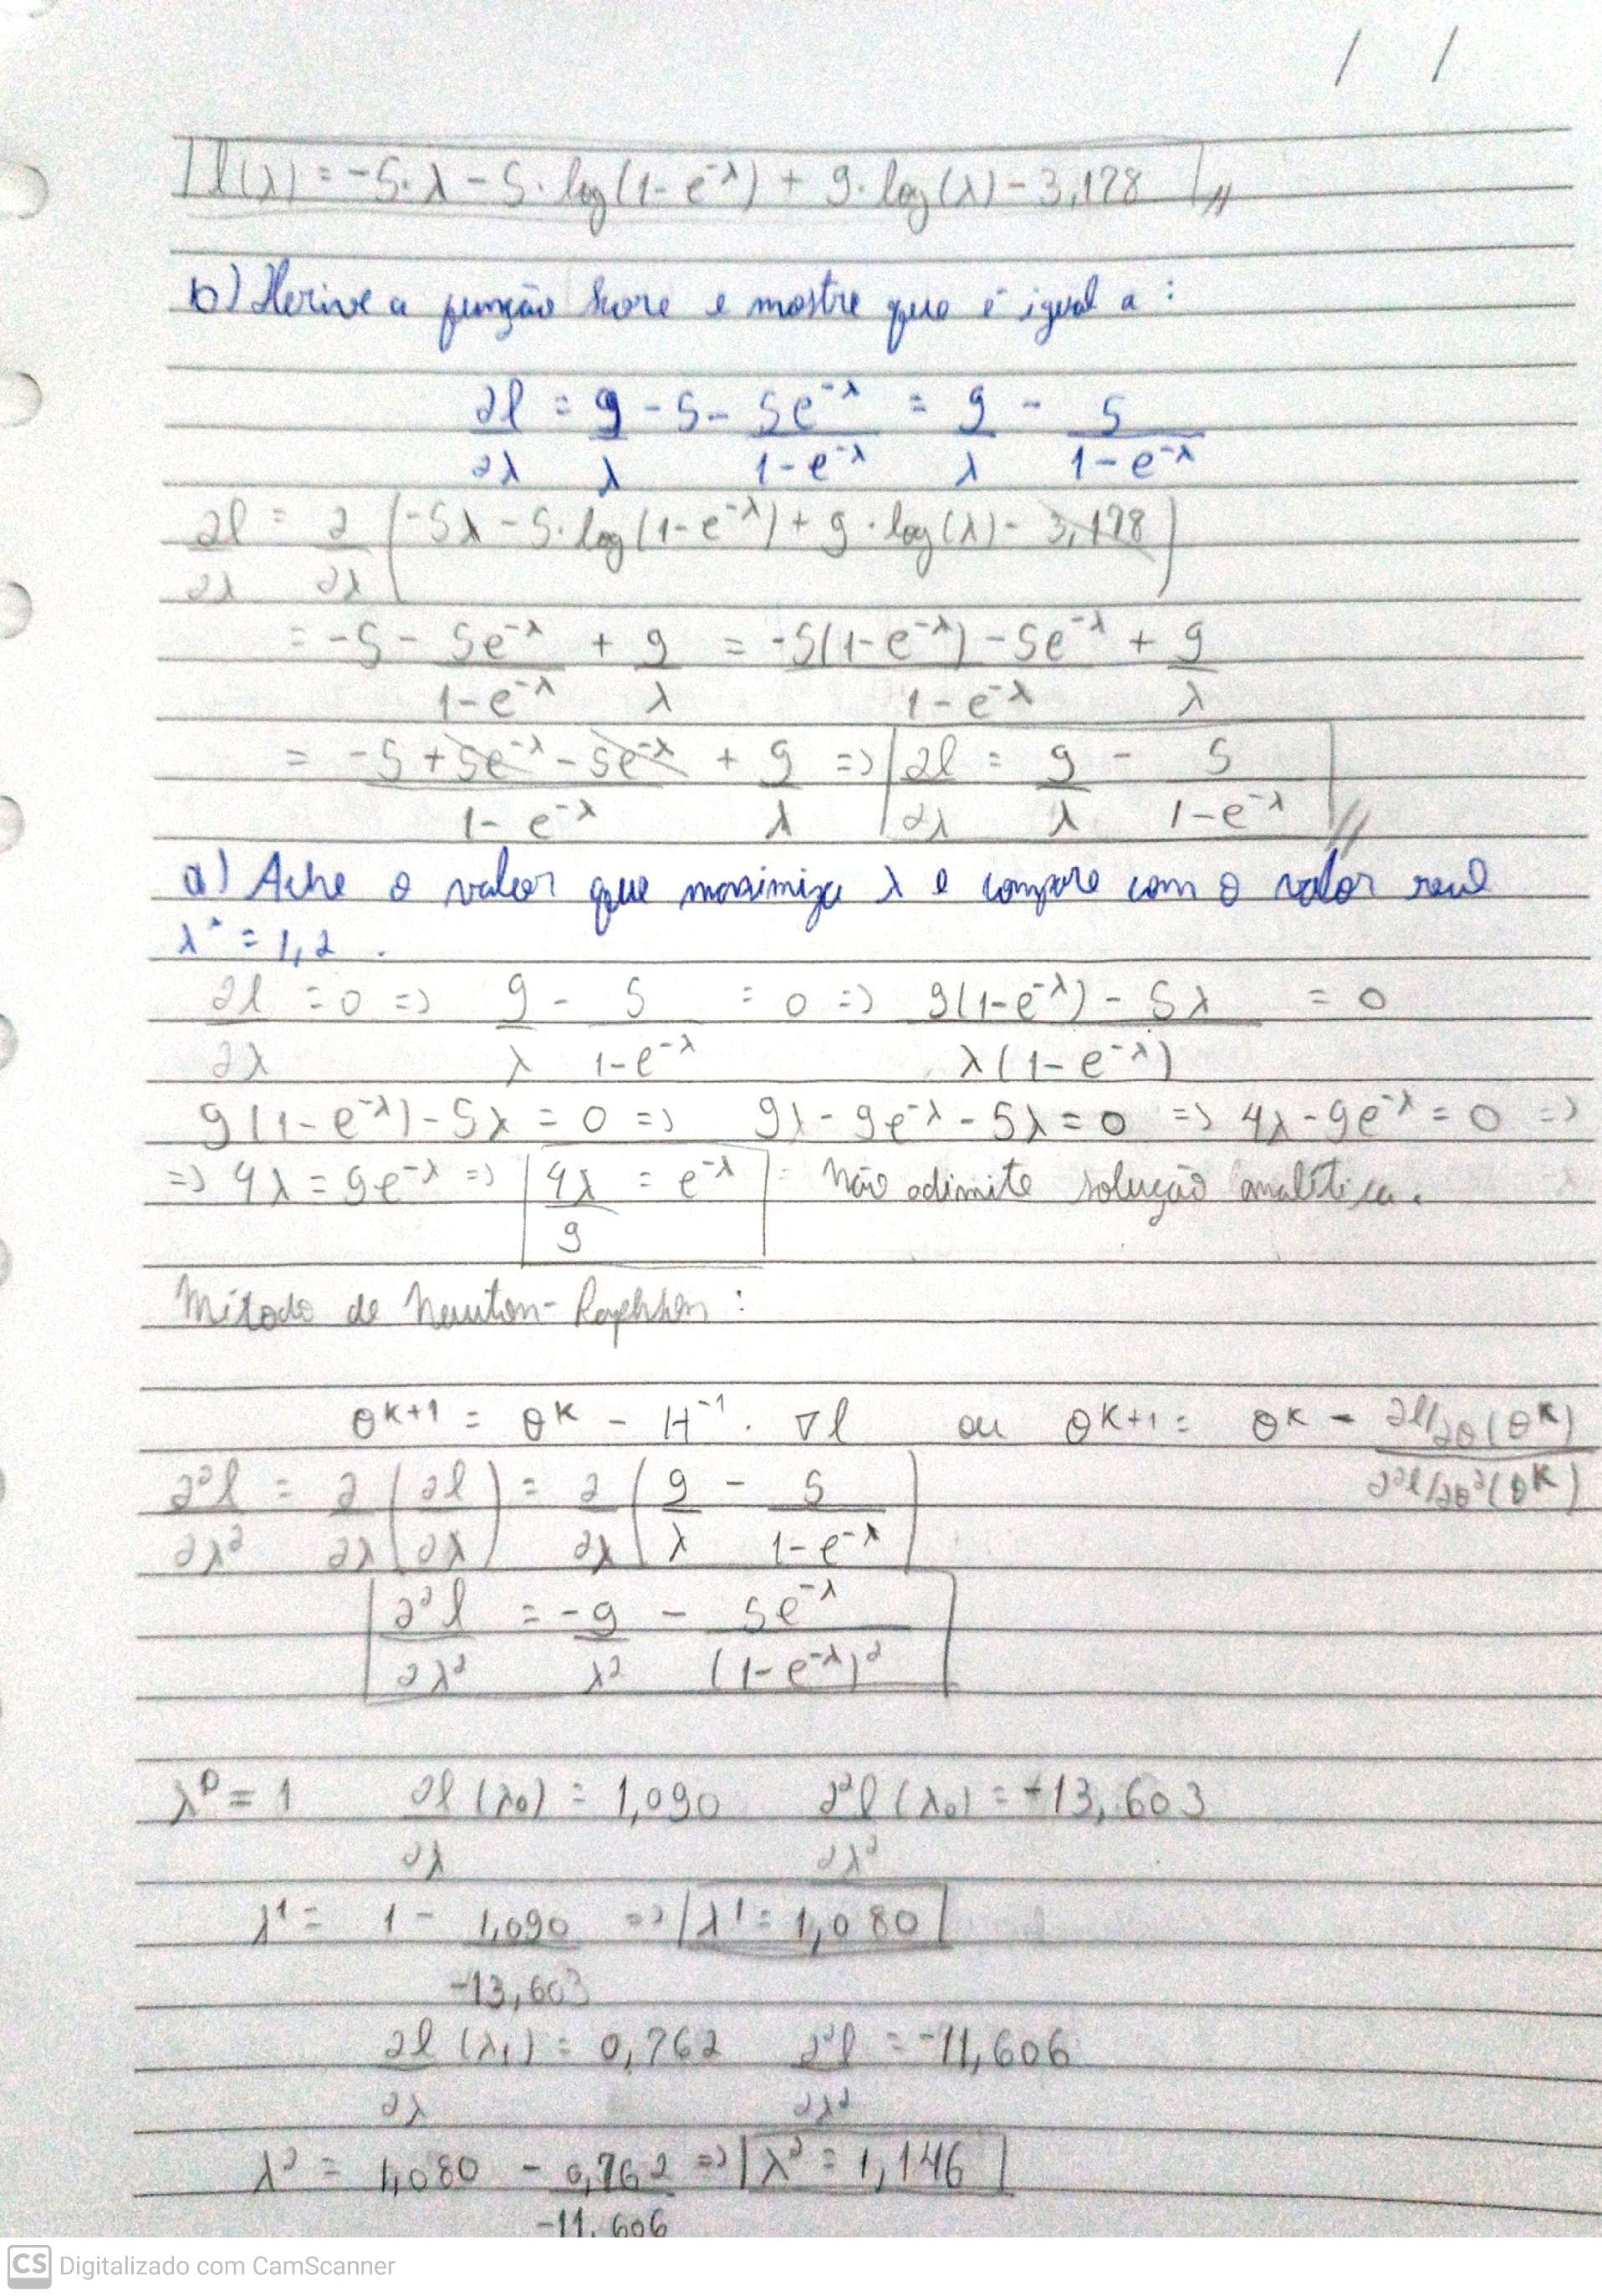

![Lista 6 - FECD_B - Bruno Leal Fonseca _03_2.jpg](<attachment:Lista 6 - FECD_B - Bruno Leal Fonseca _03_2.jpg>)
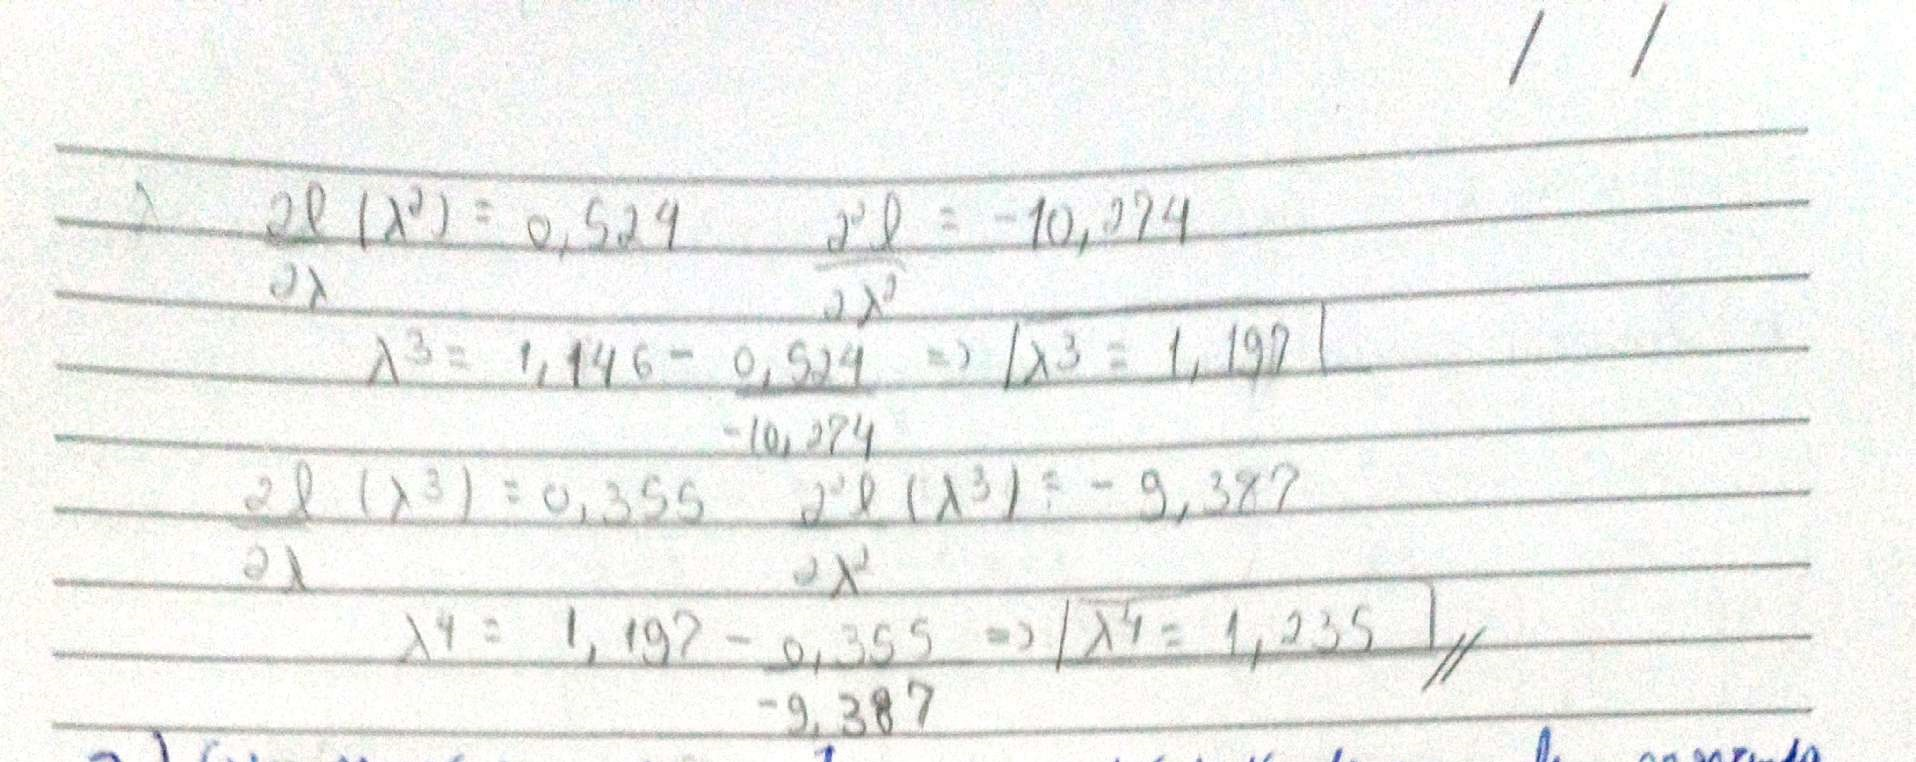

In [10]:
from scipy.optimize import root_scalar

@dataclass
class MLEPoisson:
    lambda_true: float
    sample: list[float]

    def dl_dlambda(self, param):
        return (np.sum(self.sample) / param) - (len(self.sample) / (1 - np.exp(-param)))

    def dl_dlambda_prime(self, param):
        return -(np.sum(self.sample) / param**2) - (len(self.sample) * np.exp(-param)) / (1 - np.exp(-param)) ** 2

    def get_score_function(self, interval: tuple, size: int, plot: bool = False):
        interval_values = np.linspace(interval[0], interval[1], size)
        score_function = (np.sum(self.sample) / interval_values) - (len(self.sample) / (1 - np.exp(-interval_values)))

        lambda_optimal = root_scalar(self.dl_dlambda, fprime=self.dl_dlambda_prime, x0=self.sample[0], method="newton")

        if plot:
            plt.figure()
            plt.plot(interval_values, score_function)
            plt.axvline(x=self.lambda_true, color="green")
            plt.axvline(x=lambda_optimal.root, color="red")
            plt.grid()
            plt.legend(["Score Function", "True Value", r"$\hat{\lambda}(y)$"])
            plt.show()

        return score_function, lambda_optimal

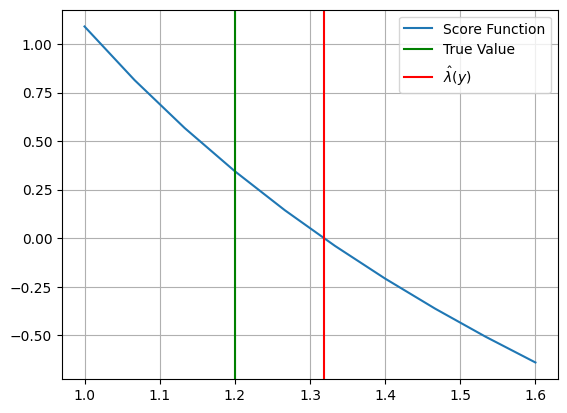

(array([ 1.09011647,  0.81376154,  0.56699906,  0.3449362 ,  0.14371177,
        -0.03976177, -0.20798266, -0.36299382, -0.50648193, -0.63985176]),
       converged: True
            flag: converged
  function_calls: 78
      iterations: 39
            root: 1.3183739129383107
          method: newton)

In [11]:
mle_poisson = MLEPoisson(1.2, [1, 2, 1, 3, 2])
mle_poisson.get_score_function((1.0, 1.6), 10, plot=True)

# Questão 3

![Lista 6 - FECD_B - Bruno Leal Fonseca _04_1.jpg](<attachment:Lista 6 - FECD_B - Bruno Leal Fonseca _04_1.jpg>)
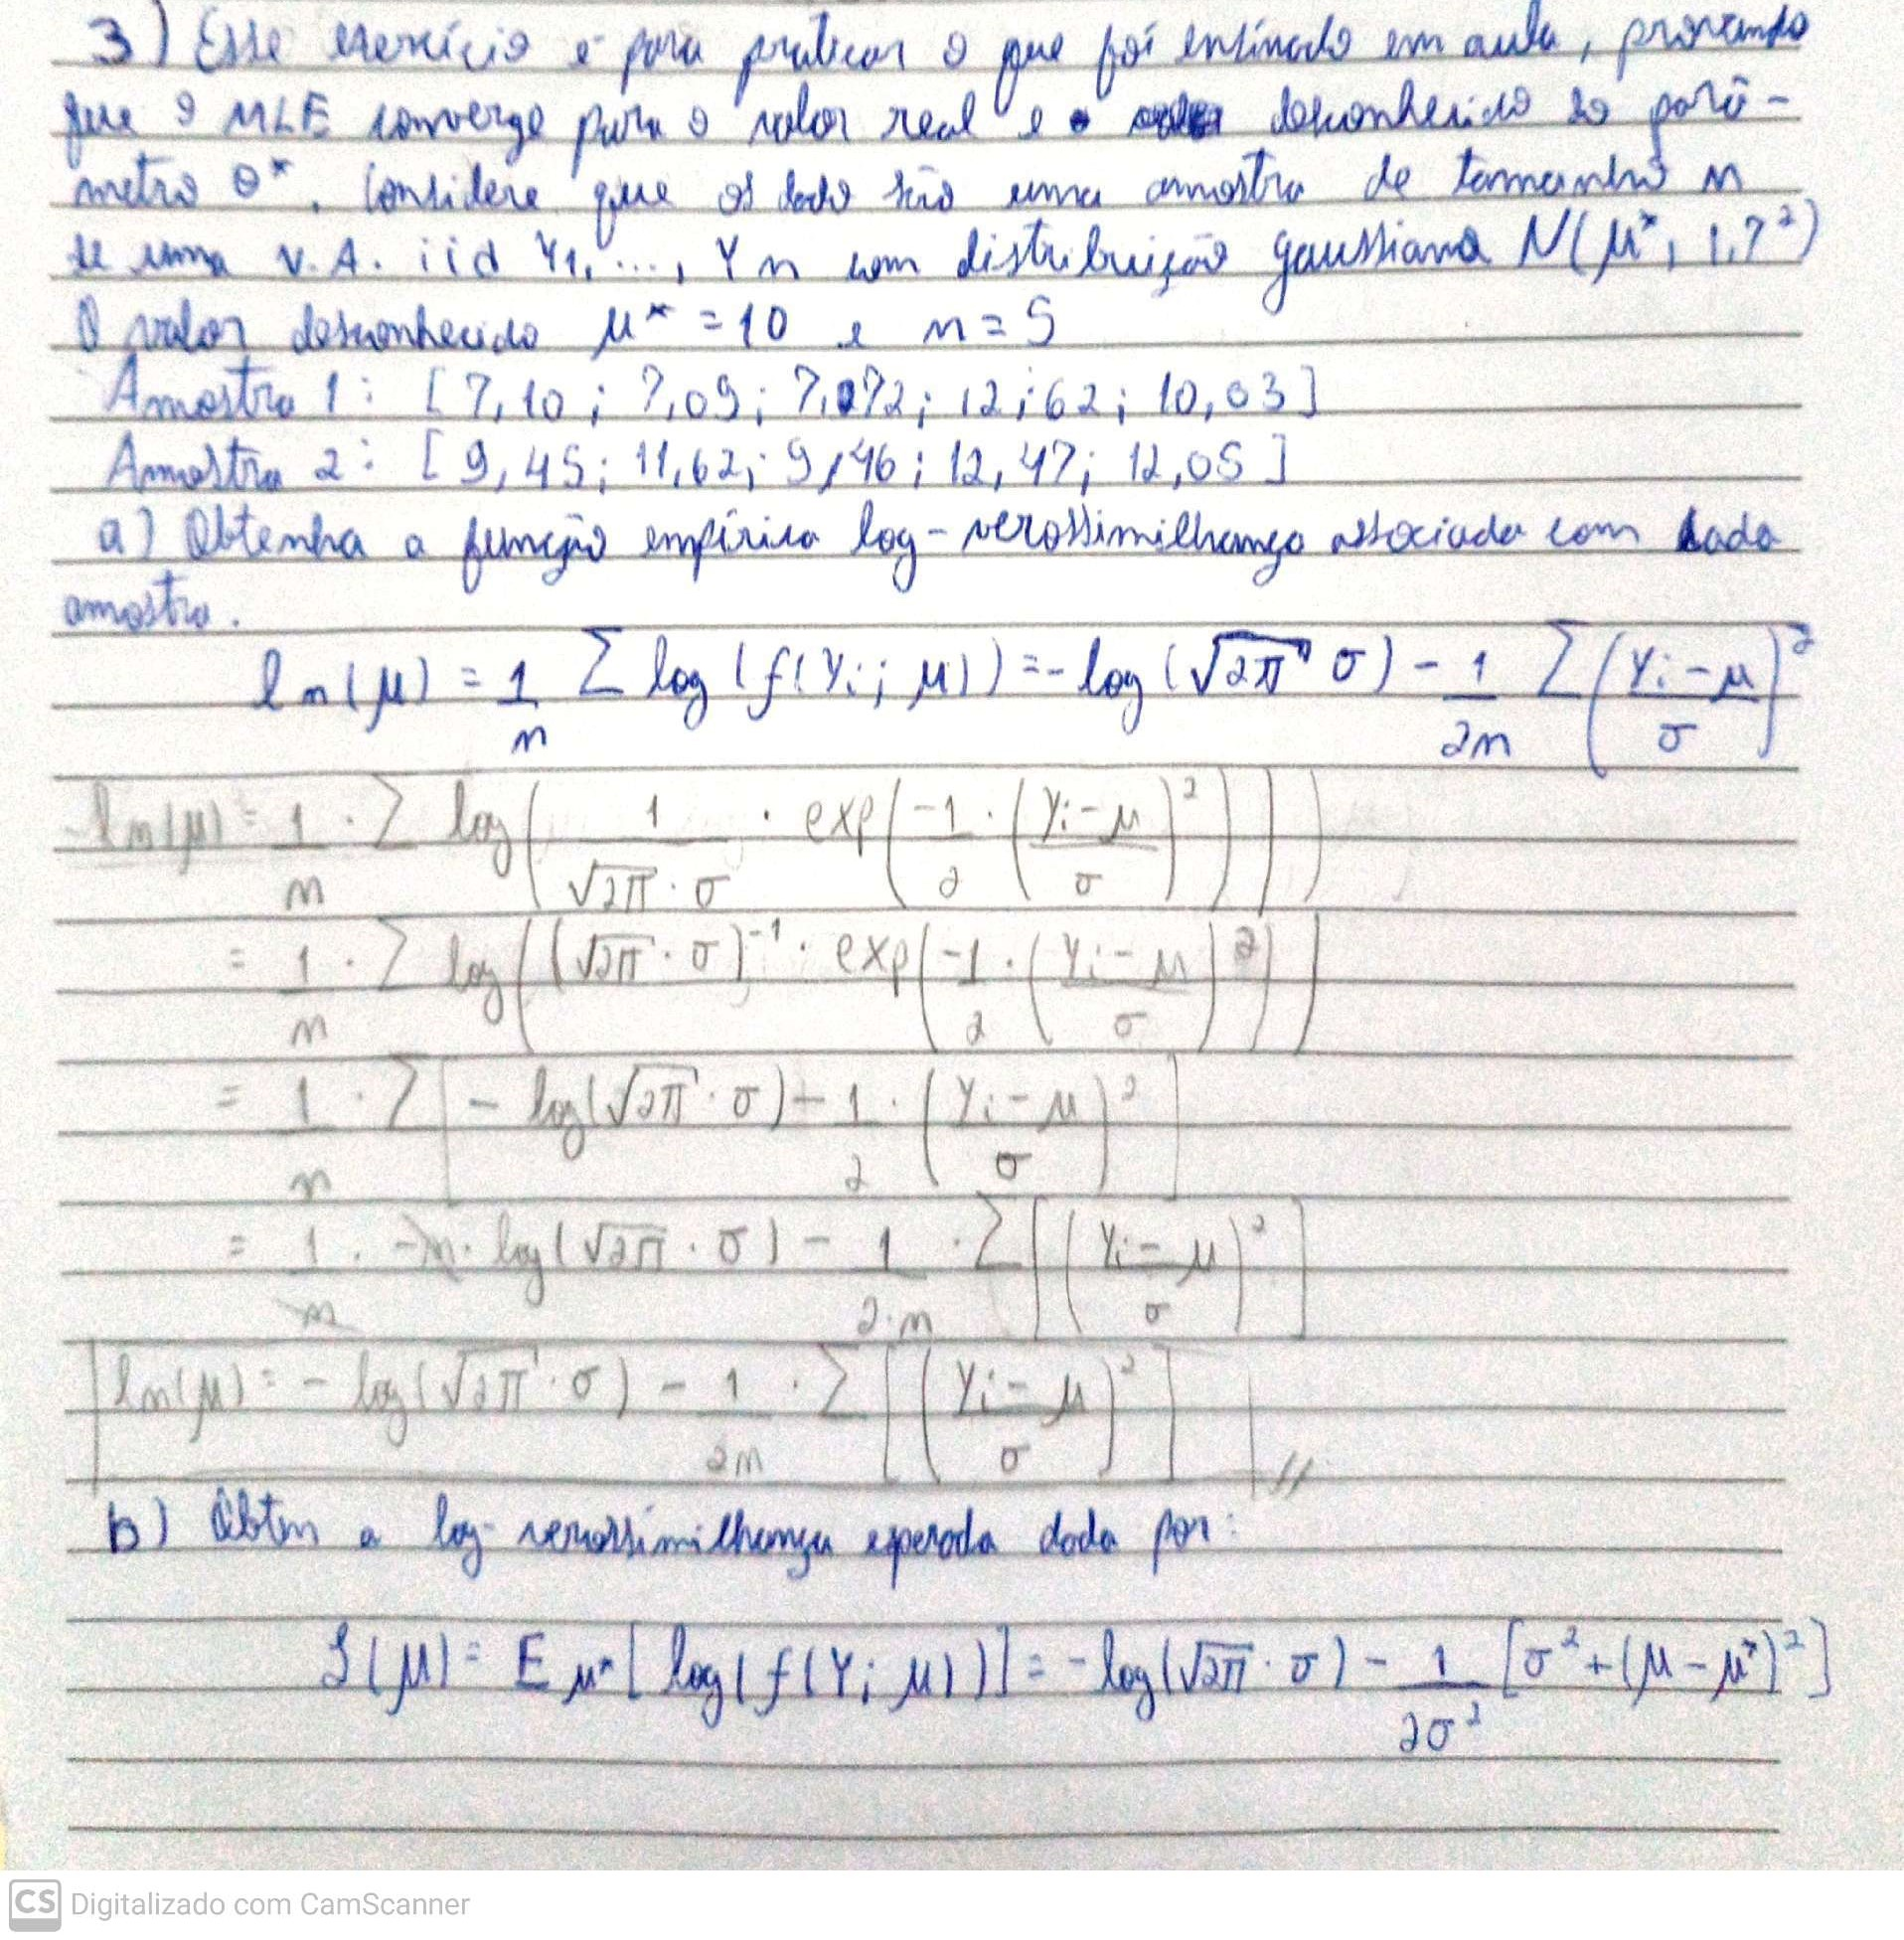

![Lista 6 - FECD_B - Bruno Leal Fonseca _05.jpg](<attachment:Lista 6 - FECD_B - Bruno Leal Fonseca _05.jpg>)
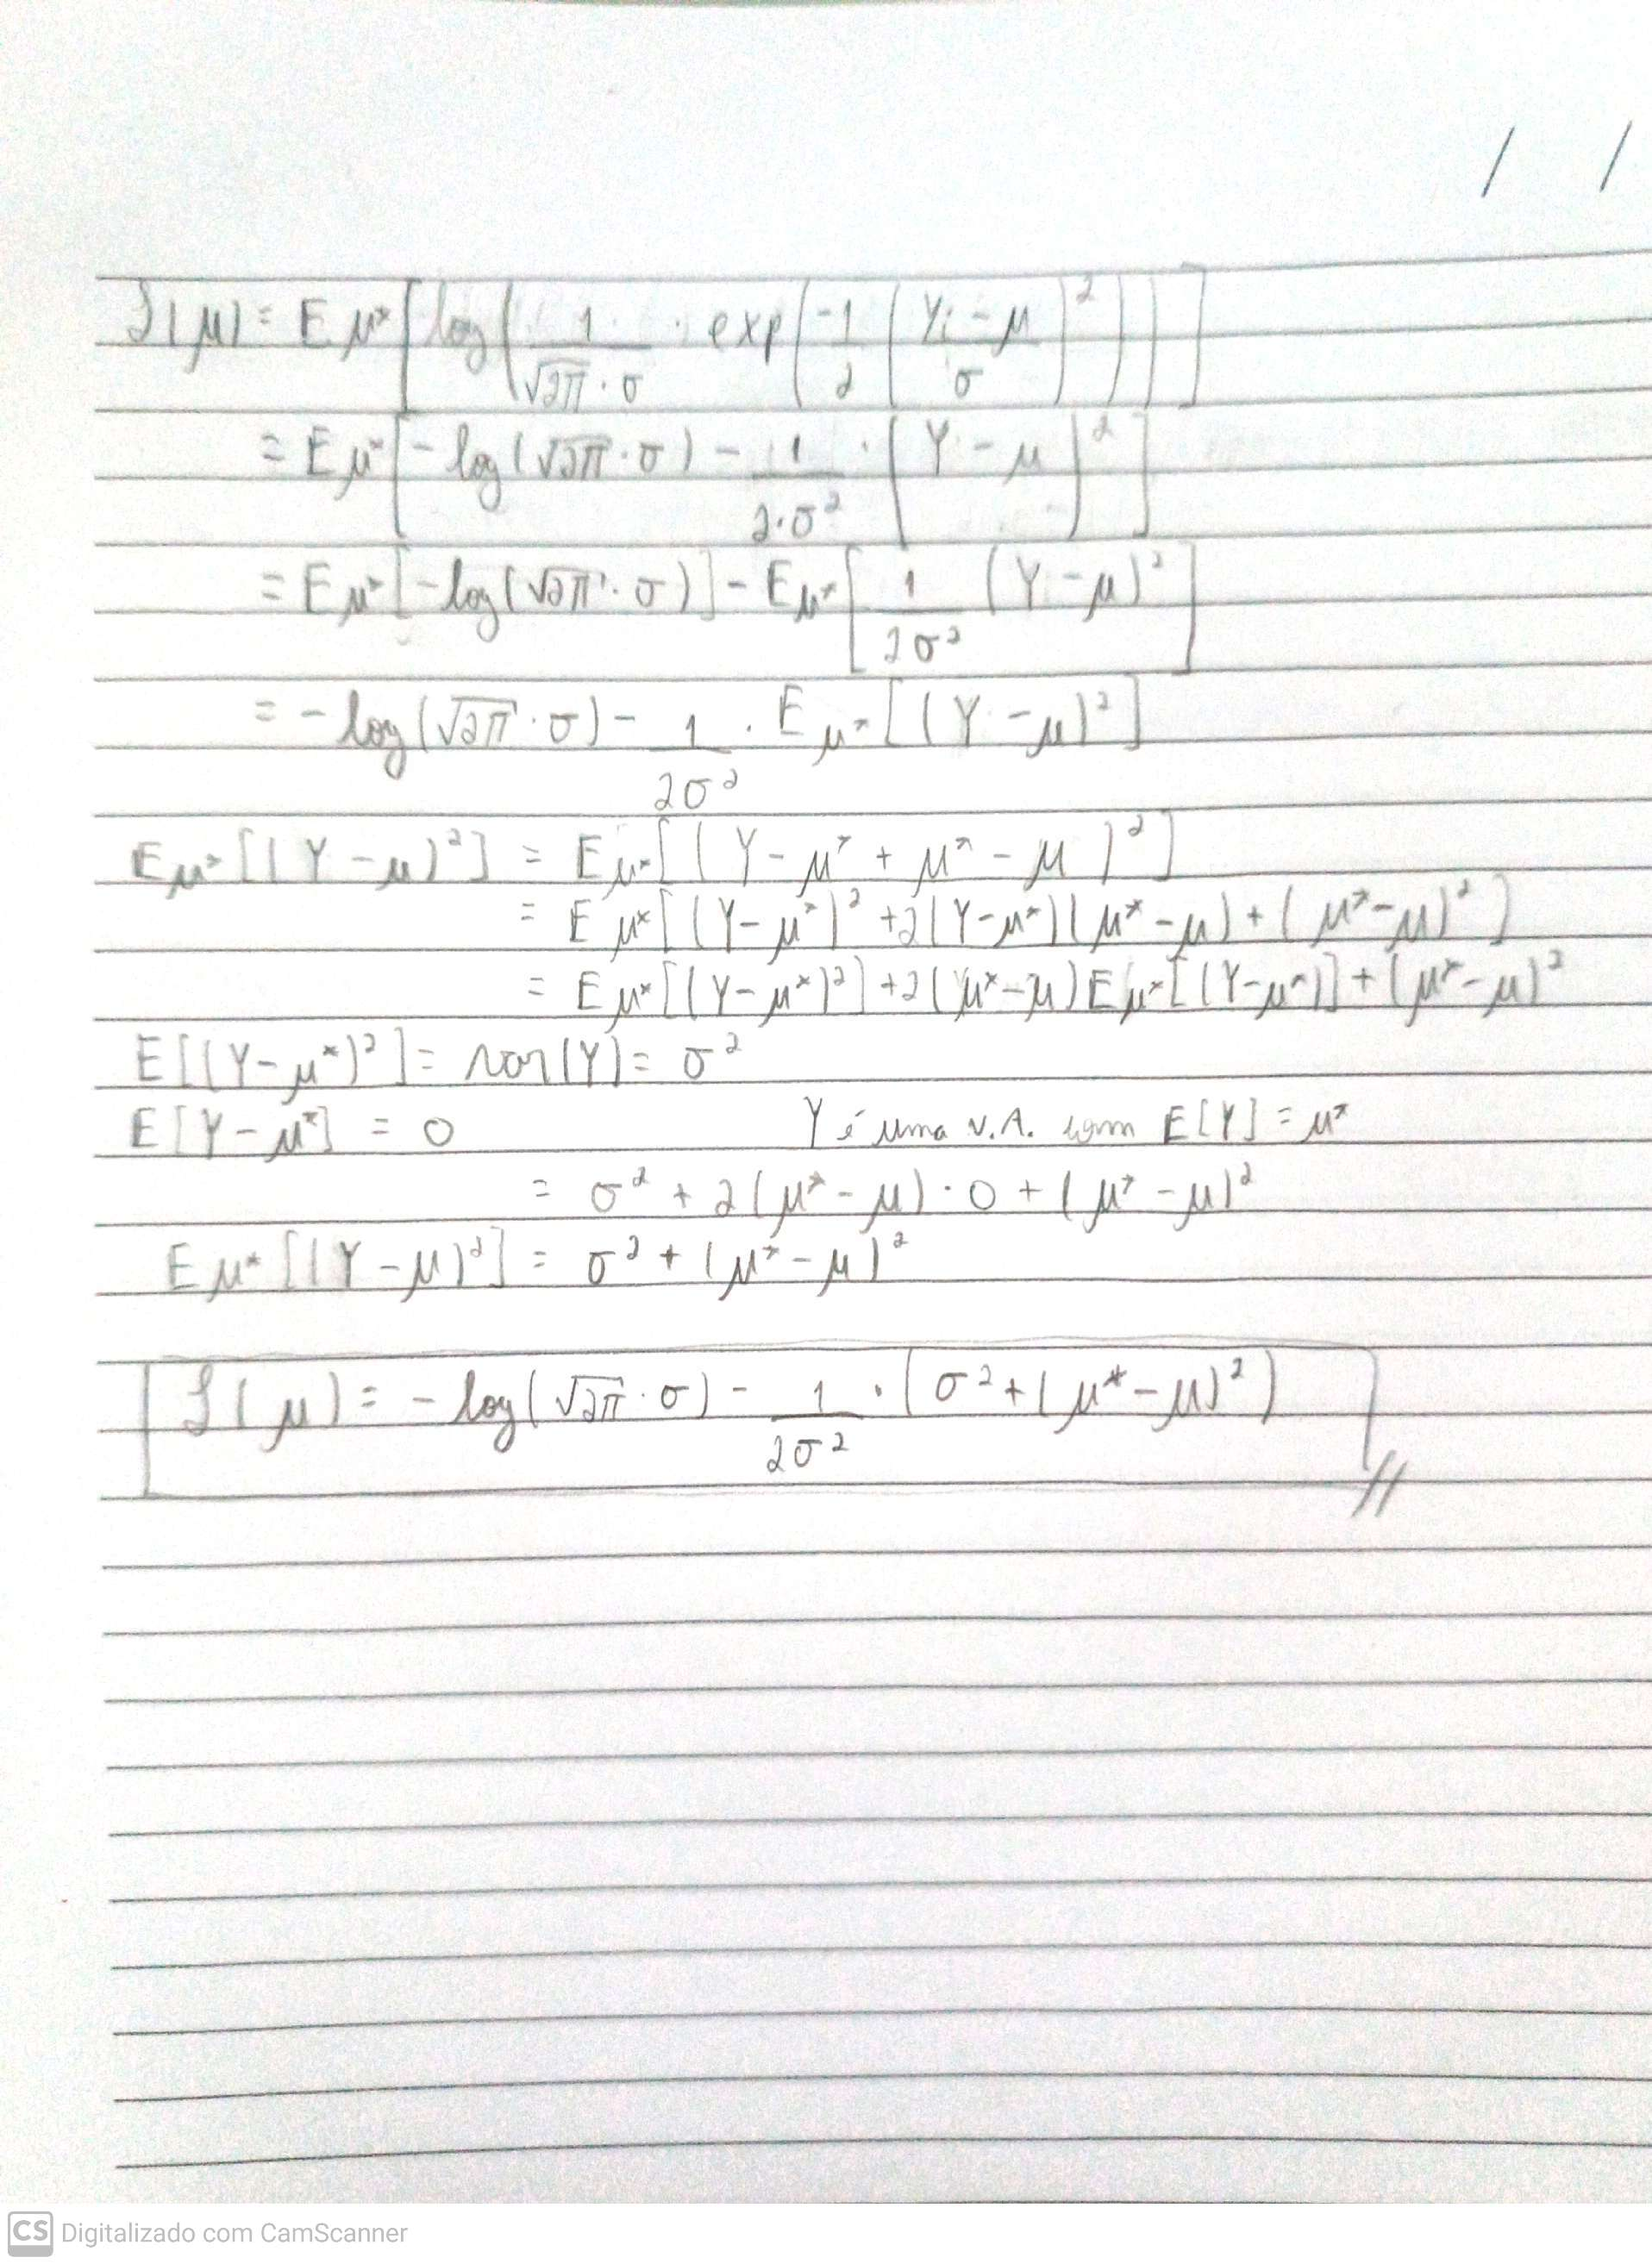

Complementando a classe criada anteriormente na Questão 1 com as seguintes funções, pode-se realizar o plot da log-verossimilhança

In [15]:
from dataclasses import dataclass
from typing import List
from math import log, sqrt, pi
import numpy as np
from scipy.optimize import root_scalar
import matplotlib.pyplot as plt


@dataclass
class MLEGaussian:
    sigma2: float
    mu_true: float
    sample: list[float]

    def get_log_likelihood(self, interval: tuple, size: int, plot: bool = True):
        interval_values = np.linspace(interval[0], interval[1], size)

        log_lik_list = []
        for mu_value in interval_values:
            log_lik = -log(sqrt(2 * pi * self.sigma2)) - (1 / (2 * len(self.sample))) * (
                np.sum(((self.sample - mu_value) / sqrt(self.sigma2)) ** 2)
            )
            log_lik_list.append(log_lik)

        if plot:
            plt.figure()
            plt.plot(interval_values, log_lik_list)
            plt.grid()
            plt.show()

        return log_lik_list


def compare_log_lik(optimizers: List[MLEGaussian], interval: tuple, size: int, mu_true: float, sigma2_true: float):
    log_lik_list = []

    for opt in optimizers:
        log_lik_values = opt.get_log_likelihood(interval, size, plot=False)
        log_lik_list.append(log_lik_values)

    plt.figure()
    interval_values = np.linspace(interval[0], interval[1], size)
    for idx, lg_lk in enumerate(log_lik_list):
        plt.plot(interval_values, lg_lk, color=f"C{idx}", label=f"Sample {idx+1}")

    mu_true_list = []
    for mu_val in interval_values:
        mu_true_value = -log(sqrt(2 * pi * sigma2_true)) - (1 / (2 * sigma2_true)) * (
            sigma2_true + (mu_val - mu_true) ** 2
        )
        mu_true_list.append(mu_true_value)

    plt.plot(interval_values, mu_true_list, color="red", label="Expected Log-Lik")
    plt.legend()
    plt.title(f"Log-Likelihood for samples with n={len(optimizers[0].sample)}")
    plt.grid()
    plt.show()


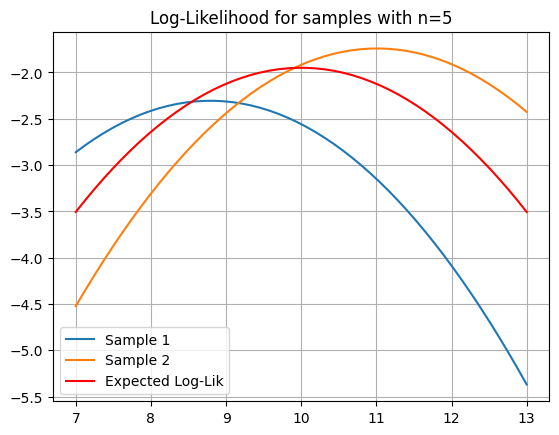

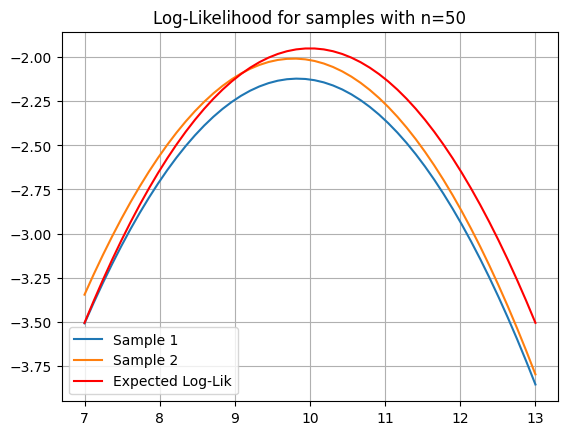

In [18]:
mle1 = MLEGaussian(1.7**2, 10.0, [7.10, 7.09, 7.12, 12.62, 10.03])
mle1.get_log_likelihood((7, 13), 50, plot=False)

mle2 = MLEGaussian(1.7**2, 10.0, [9.45, 11.62, 9.46, 12.47, 12.05])
mle2.get_log_likelihood((7, 13), 50, plot=False)

compare_log_lik([mle1, mle2], (7, 13), 50, 10, 1.7**2)

mle1 = MLEGaussian(1.7**2, 10.0, list(np.random.normal(10, 1.7, 50)))
mle1.get_log_likelihood((7, 13), 50, plot=False)

mle2 = MLEGaussian(1.7**2, 10.0, list(np.random.normal(10, 1.7, 50)))
mle2.get_log_likelihood((7, 13), 50, plot=False)

compare_log_lik([mle1, mle2], (7, 13), 50, 10, 1.7**2)

- Não, a função $\mathcal{L}$ permaneceu inalterada ao aumentar o tamanho da amostra de `n=5` para `n=50`. Por se tratar do valor esperado da função log-verossimilhança, o tamanho da amostra não influência, afinal trata-se dos valores "verdadeiros" ou esperados da função. A fórmula reforça isso, pois em nenhum lugar pode-se evidenciar a influência da componente `n`;

- Sim, $\ell_n(\mu)$ -> $\mathcal{L}(\mu)$ . quase certamente (ou em probabilidade) conforme n->$\infty$, pelo Teorema da Lei dos Grandes Números. A função empírica se aproxima da função esperada conforme aumentamos a amostra. 

- Assim como $\ell_n(\mu)$ -> $\mathcal{L}(\mu)$, $\hat{\mu}_{MLE}$ -> $\mu^*$. Ou seja, o valor do parâmetro "média" estimado pelo estimador de máxima verossimilhança se aproxima do valor real $\mu^*$ à medida que o tamanho da amostra aumenta. Isso se dá pelos mesmos motivos citados acima, sendo um resultado da consistência do MLE. Também foi visto em listas anteriores, no caso da Gaussiana, que:

    Var($\frac{\partial \ell}{\partial \mu}$) = $\frac{n}{\sigma^2}$

    $\hat{\mu}_{MLE}$ ~ N($\mu$, $\frac{1}{I_n(\mu)}$)